# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [69]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [70]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pravokubanskiy
Processing Record 2 of Set 1 | hofn
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | aasiaat
Processing Record 5 of Set 1 | kisangani
Processing Record 6 of Set 1 | ulagan
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | caluquembe
Processing Record 12 of Set 1 | acuna
City not found. Skipping...
Processing Record 13 of Set 1 | clyde river
Processing Record 14 of Set 1 | ruston
Processing Record 15 of Set 1 | ndele
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | trairi
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | santa rosa
Processing Record 22 of Set 1 | veraval
Processing

In [71]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [72]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pravokubanskiy,43.9172,41.8841,9.78,92,100,0.41,RU,1681254407
1,hofn,64.2539,-15.2082,4.90,74,97,4.60,IS,1681254160
2,port alfred,-33.5906,26.8910,12.88,86,100,1.34,ZA,1681254351
3,aasiaat,68.7098,-52.8699,-8.51,97,42,2.82,GL,1681254192
4,kisangani,0.5167,25.2000,20.27,99,98,1.41,CD,1681254408


In [73]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [74]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pravokubanskiy,43.9172,41.8841,9.78,92,100,0.41,RU,1681254407
1,hofn,64.2539,-15.2082,4.90,74,97,4.60,IS,1681254160
2,port alfred,-33.5906,26.8910,12.88,86,100,1.34,ZA,1681254351
3,aasiaat,68.7098,-52.8699,-8.51,97,42,2.82,GL,1681254192
4,kisangani,0.5167,25.2000,20.27,99,98,1.41,CD,1681254408


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

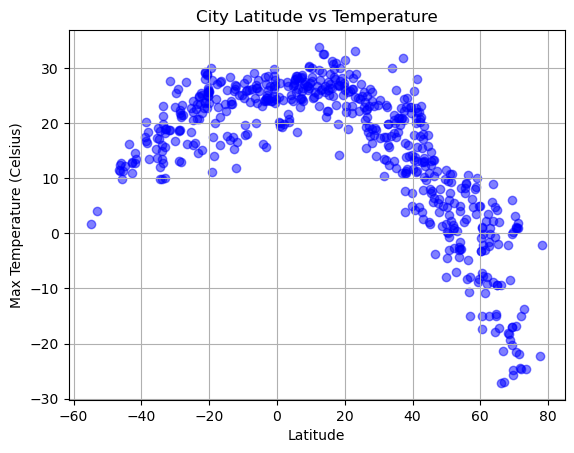

In [91]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.grid(visible=True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show();

#### Latitude Vs. Humidity

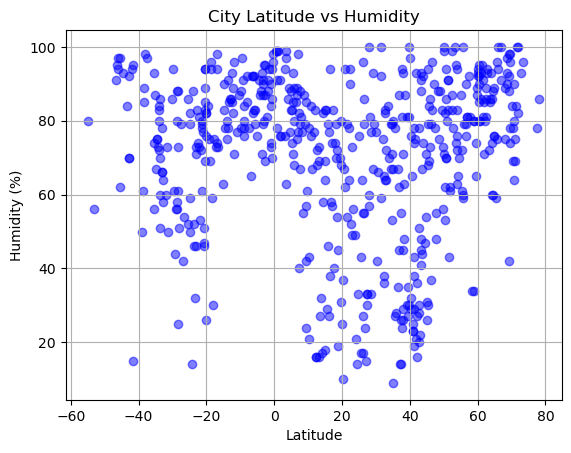

In [93]:
# Build the scatter plots for latitude vs. humidity
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

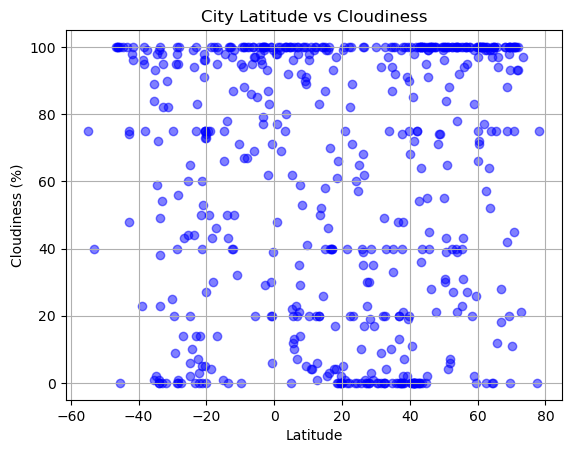

In [95]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

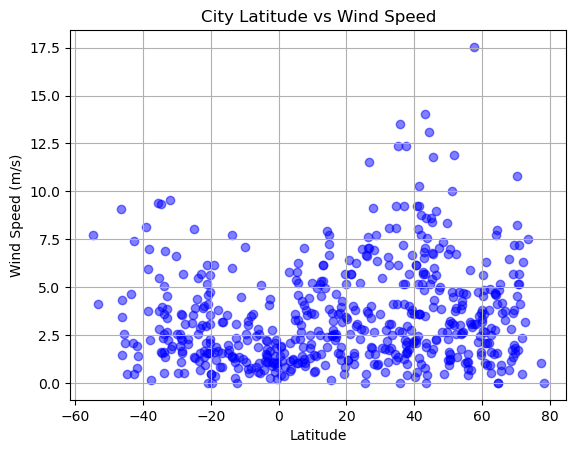

In [98]:
# Build the scatter plots for latitude vs. wind speed
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [147]:
# Define a function to create Linear Regression plots

def regression_plot(x, y):
    
# making the regression plot with input data

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_value= rvalue *2
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    
# getting the r-value and equation
    correlation = st.pearsonr(x, y)[0]
    print(f"The linear regression equation is {line_eq}")
    print(f"The r-value is {r_value}")
    
    
    




In [148]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pravokubanskiy,43.9172,41.8841,9.78,92,100,0.41,RU,1681254407
1,hofn,64.2539,-15.2082,4.90,74,97,4.60,IS,1681254160
3,aasiaat,68.7098,-52.8699,-8.51,97,42,2.82,GL,1681254192
4,kisangani,0.5167,25.2000,20.27,99,98,1.41,CD,1681254408
5,ulagan,50.6321,87.9563,-2.94,86,100,3.24,RU,1681254408


In [149]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port alfred,-33.5906,26.8910,12.88,86,100,1.34,ZA,1681254351
6,mataura,-46.1927,168.8643,11.38,97,100,1.47,NZ,1681254307
7,rikitea,-23.1203,-134.9692,24.71,71,100,2.85,PF,1681254350
9,hithadhoo,-0.6000,73.0833,27.87,70,6,0.82,MV,1681254296
10,caluquembe,-13.7833,14.6833,16.95,80,78,1.34,AO,1681254408


###  Temperature vs. Latitude Linear Regression Plot

The linear regression equation is y = -0.6x + 35.21
The r-value is -1.7249061590622836


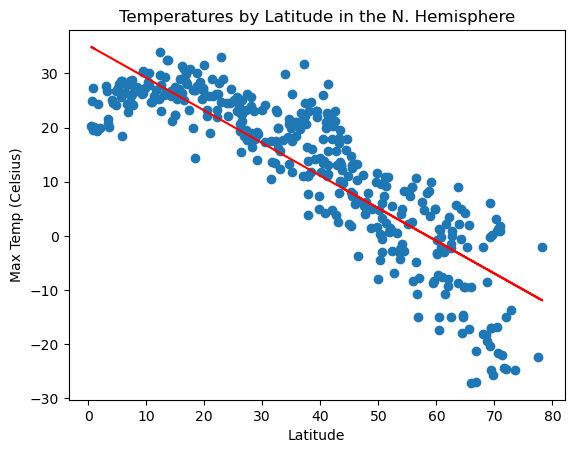

In [150]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])


plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celsius)')
plt.title("Temperatures by Latitude in the N. Hemisphere")

plt.show();


The linear regression equation is y = 0.29x + 27.37
The r-value is 1.3650010200114713


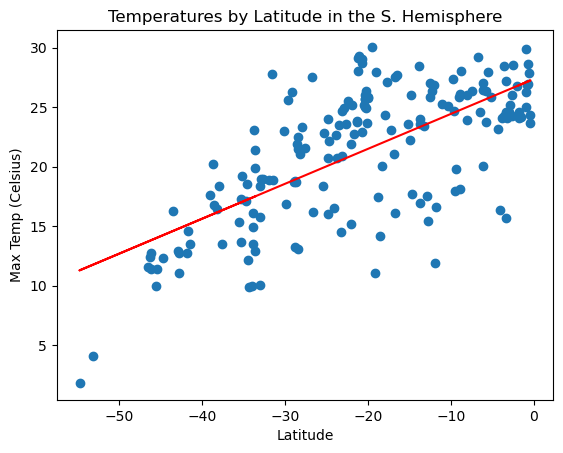

In [151]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])


plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celsius)')
plt.title("Temperatures by Latitude in the S. Hemisphere")
plt.show();

**Discussion about the linear relationship:** 

As the city location is closer to the equator, the temperature max values increase. This trend is prevelant in both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The linear regression equation is y = 0.25x + 58.58
The r-value is 0.4268789858640687


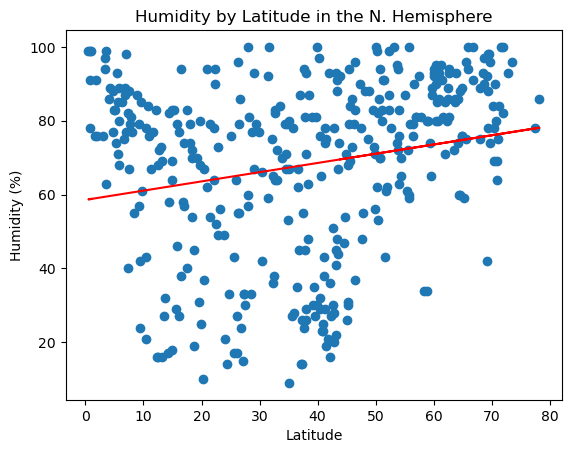

In [152]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Humidity by Latitude in the N. Hemisphere")

plt.show();

The linear regression equation is y = 0.31x + 82.52
The r-value is 0.47971812101563616


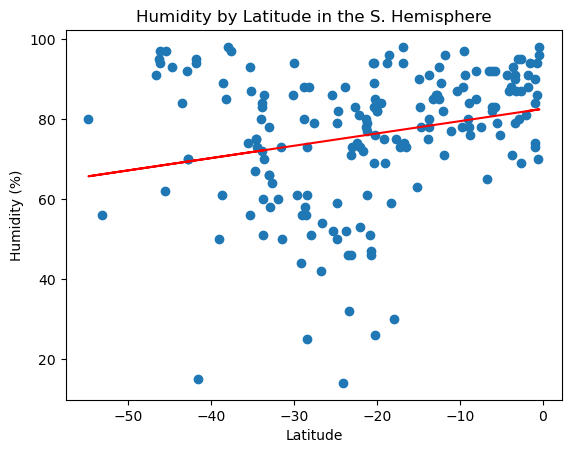

In [153]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Humidity by Latitude in the S. Hemisphere")

plt.show();

**Discussion about the linear relationship:** There is a slight correlation between humidity and latitude in the data shown. As latitude gets closer to the equator, humidity increases slightly.

### Cloudiness vs. Latitude Linear Regression Plot

The linear regression equation is y = 0.37x + 44.3
The r-value is 0.3717226931301358


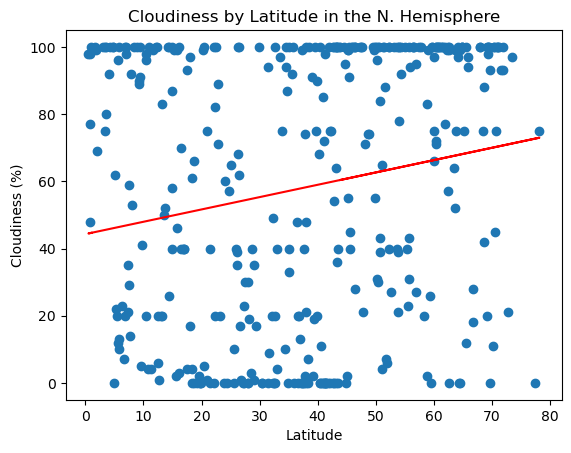

In [154]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness by Latitude in the N. Hemisphere")

plt.show();

The linear regression equation is y = 0.31x + 70.39
The r-value is 0.22623438075782346


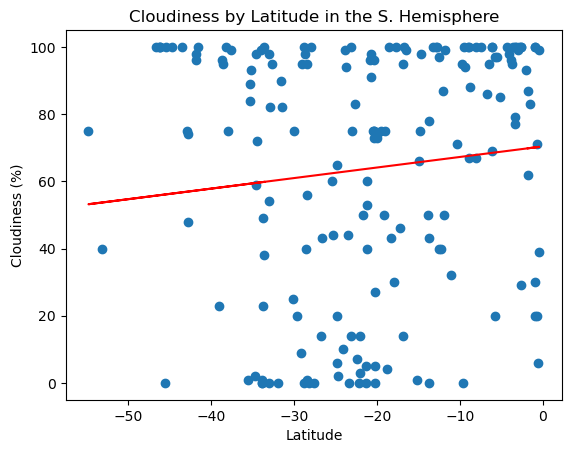

In [155]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness by Latitude in the S. Hemisphere")

plt.show();

**Discussion about the linear relationship:** According to this data, cloudiness does not show strong correlation to where a city is in relation to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The linear regression equation is y = 0.01x + 3.29
The r-value is 0.18796485078371455


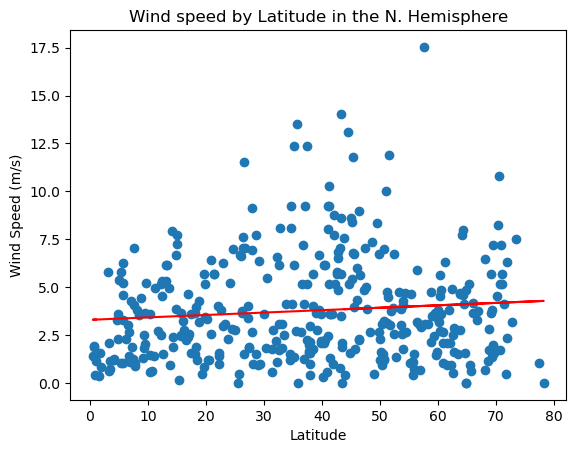

In [156]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("Wind speed by Latitude in the N. Hemisphere")

plt.show();

The linear regression equation is y = -0.05x + 1.55
The r-value is -0.697184843499671


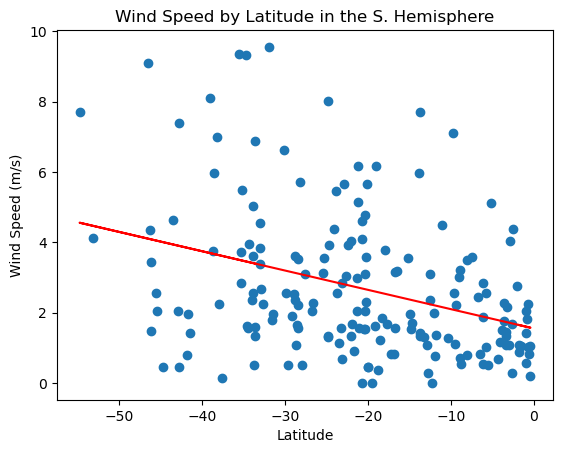

In [157]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("Wind Speed by Latitude in the S. Hemisphere")

plt.show();

**Discussion about the linear relationship:**

While the relationship of wind speed and latitude is weak in the northern hemisphere, this data shows that it is more significantly correlated when looking at the southern hemisphere.